# **1. Import Library**


Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**


Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.


In [7]:
df = pd.read_csv('data/marketing_campaign_clean.csv')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Age  
0         11         1   67  
1         11         0   70  
2         11         0   59  
3         11         0   40  
4         11         0   43  

[5 rows x 30 columns]

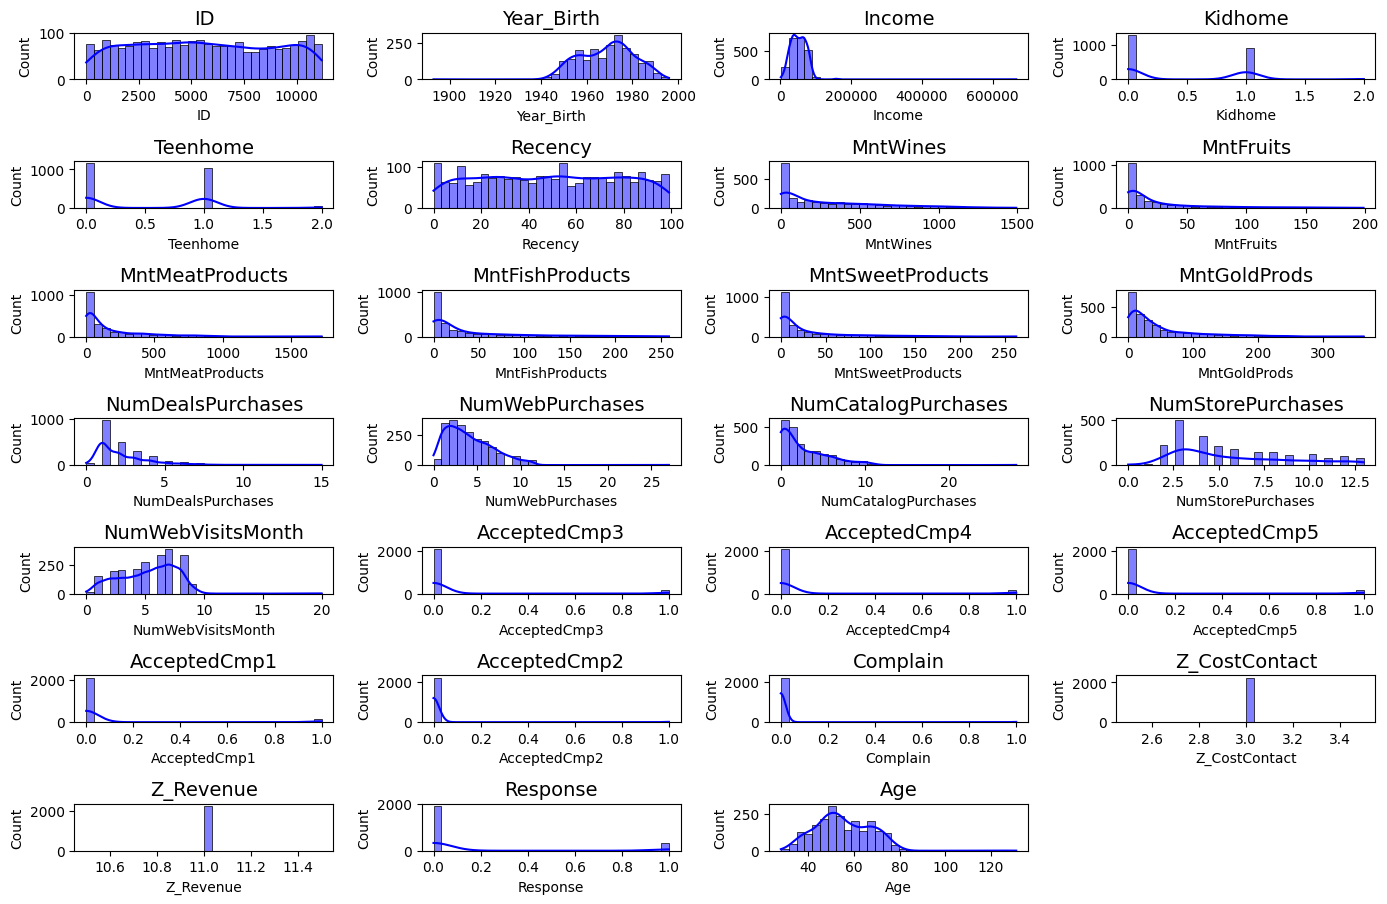

In [8]:
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
  plt.subplot(8, 4, i)
  sns.histplot(df[column], bins=30, kde=True, color='blue')
  plt.title(column, size=14)
plt.tight_layout()
plt.show()

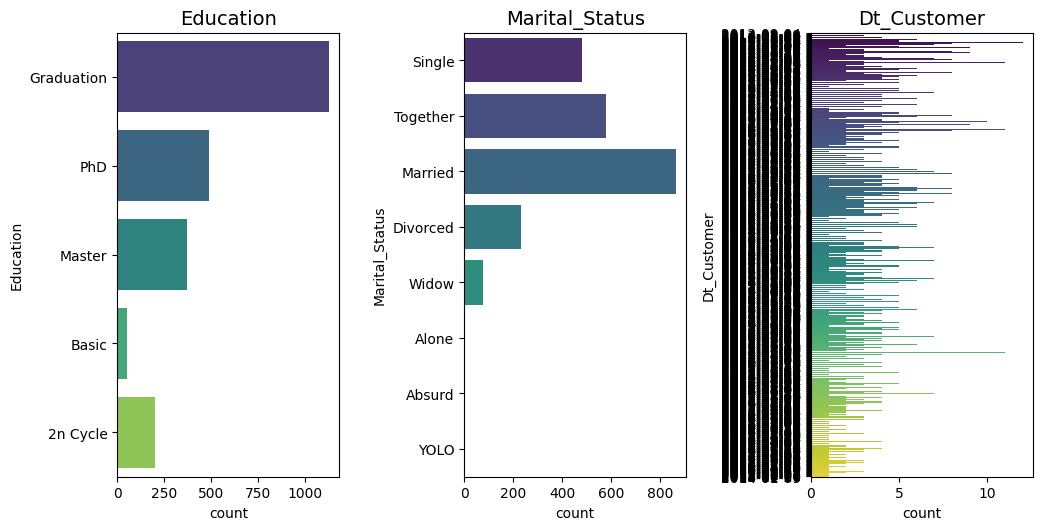

In [9]:
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 10))
for i, column in enumerate(cat_features.columns, 1):
  plt.subplot(2, 4, i)
  sns.countplot(y=df[column], hue=df[column], palette='viridis', legend=False)
  plt.title(column, size=14)
plt.tight_layout()
plt.show()

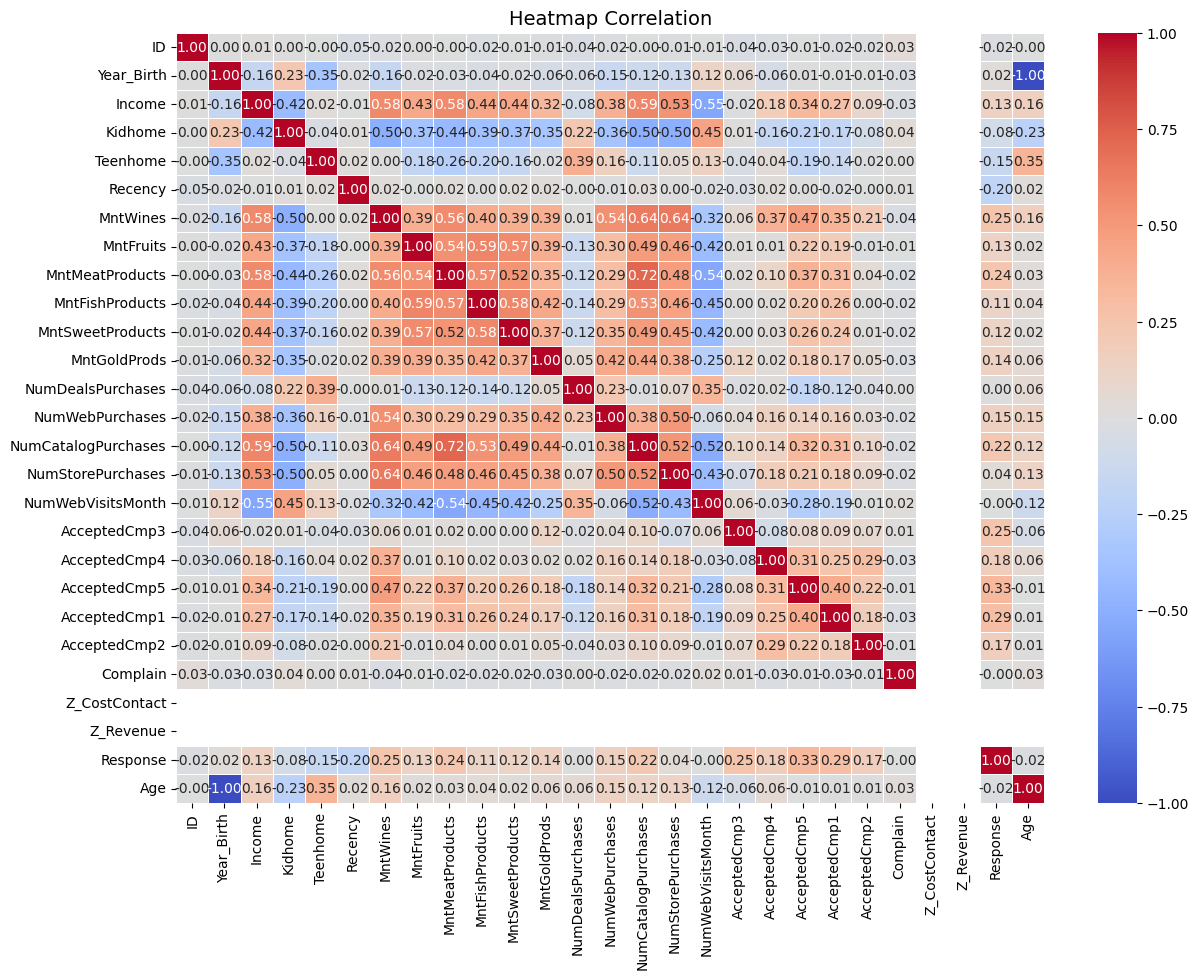

In [10]:
plt.figure(figsize=(14, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Correlation', size=14)
plt.show()

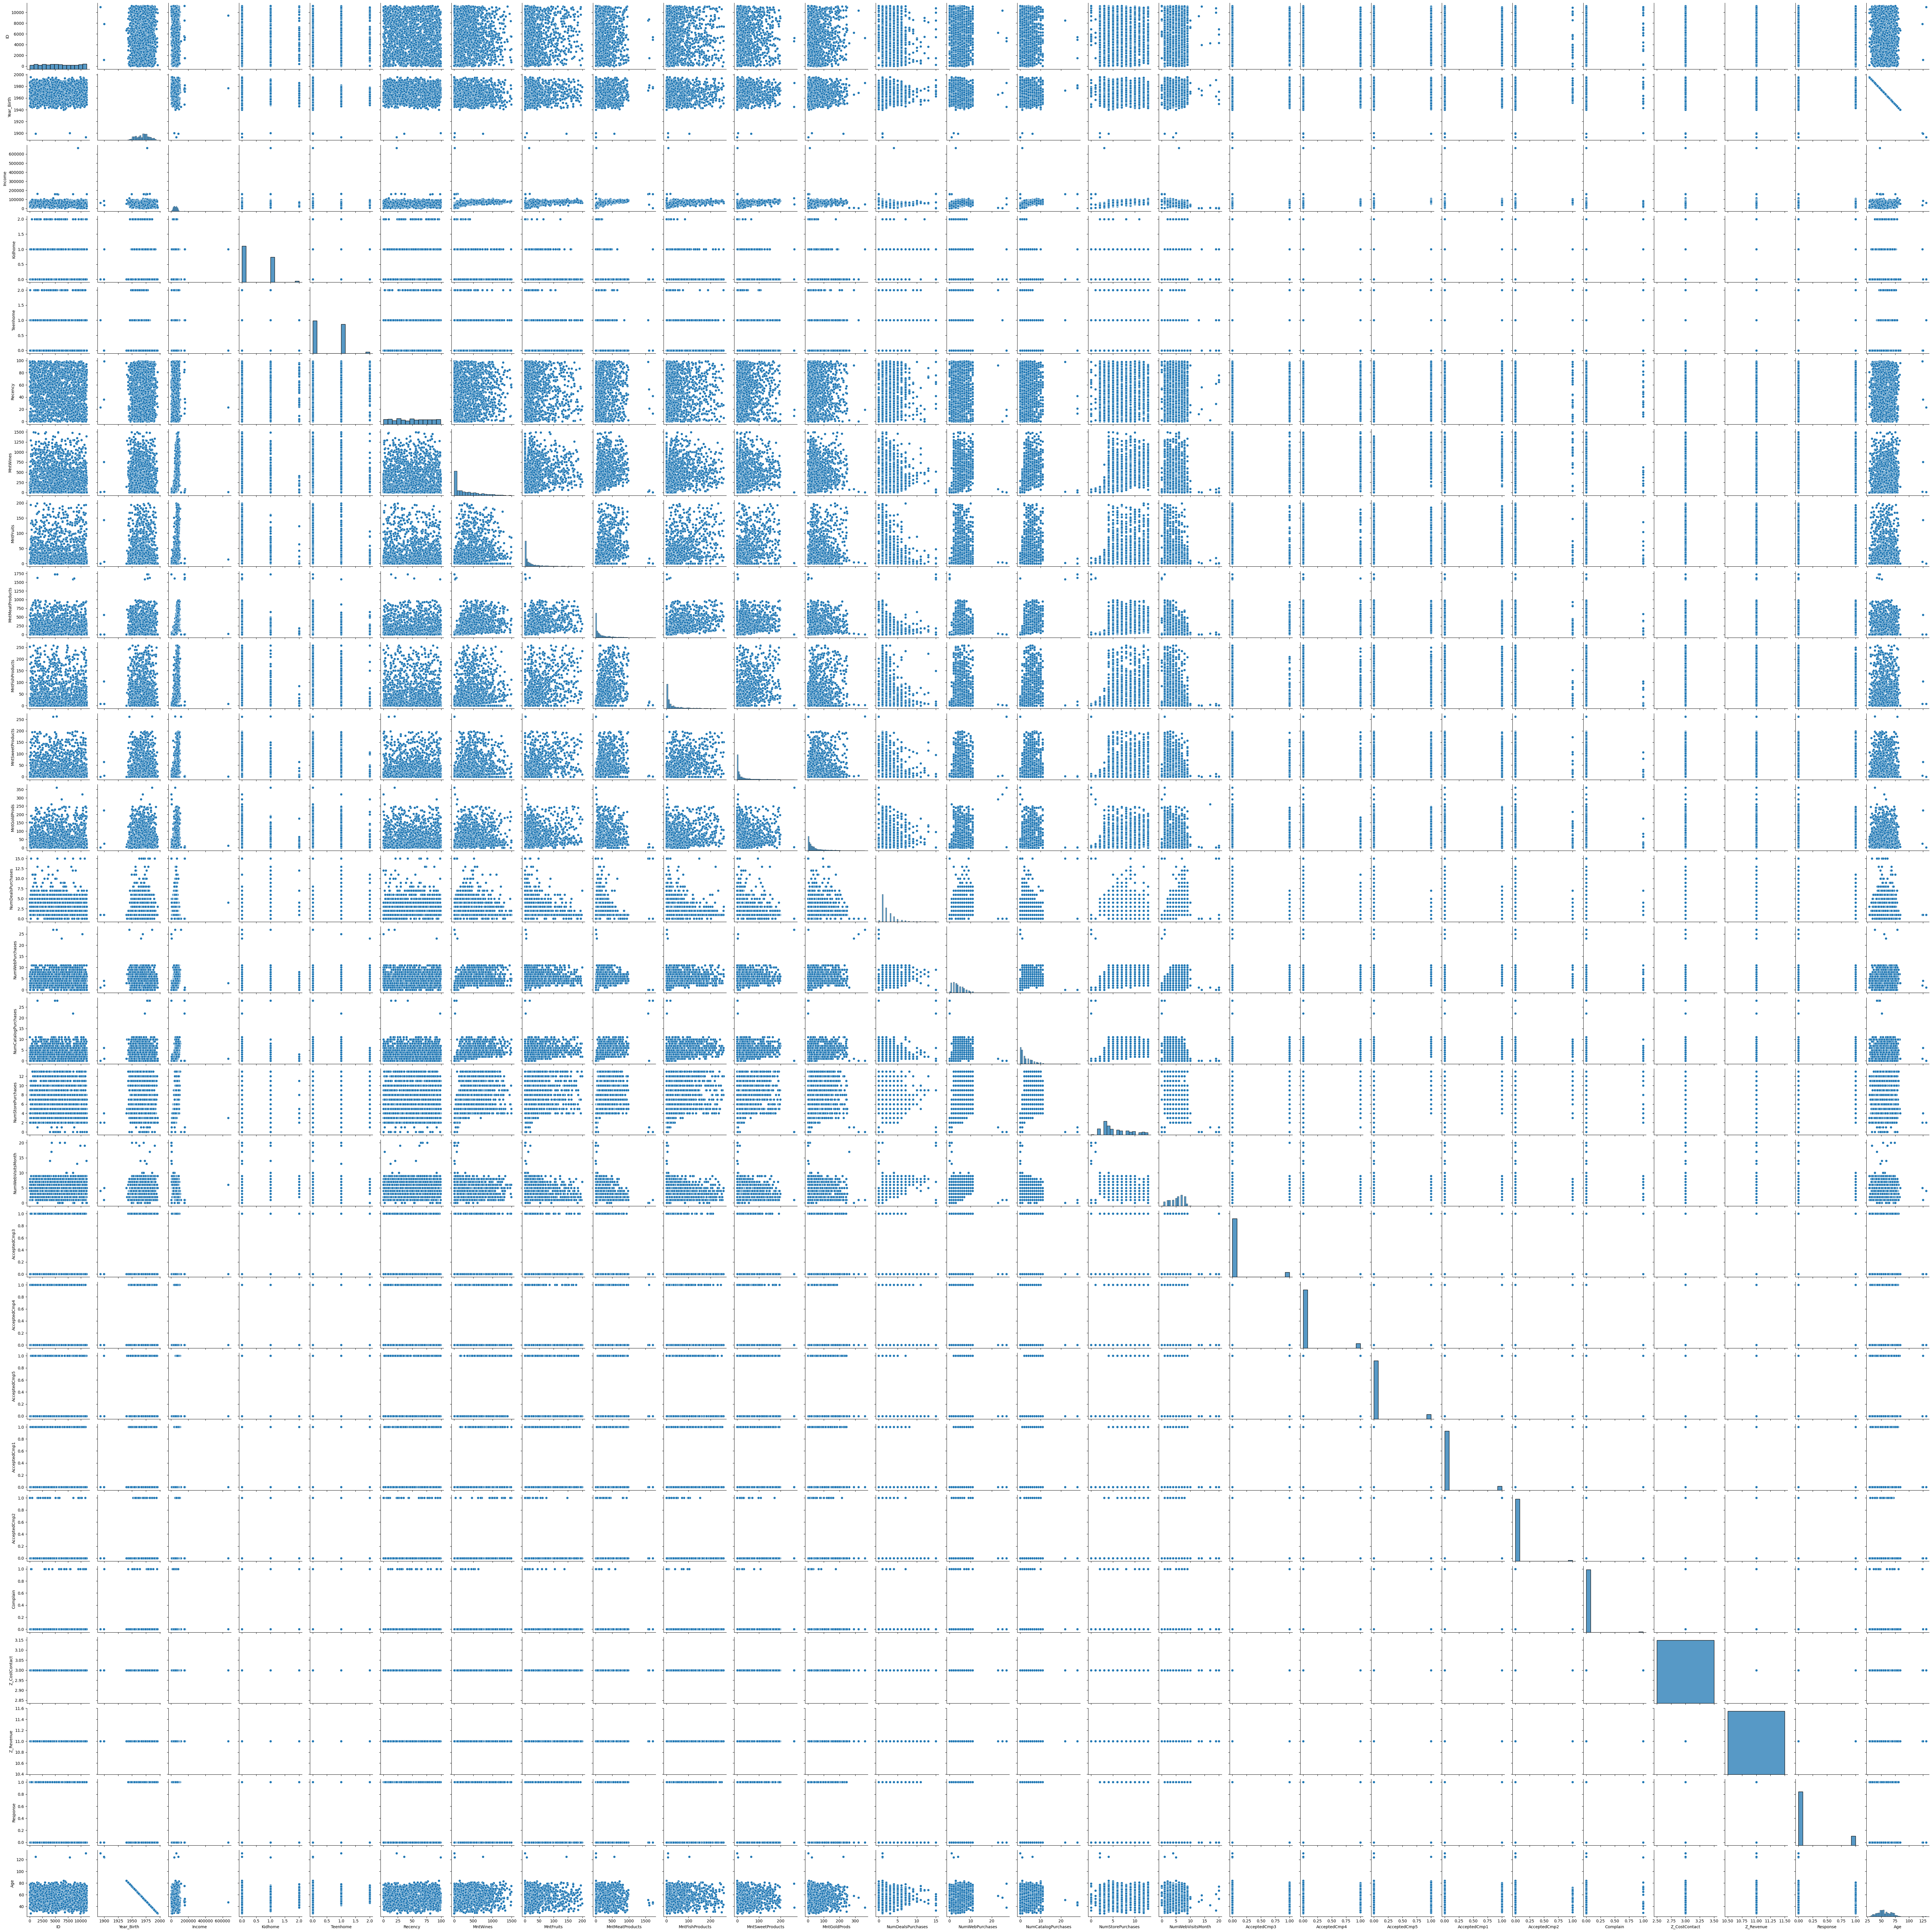

In [11]:
sns.pairplot(num_features)
plt.show()

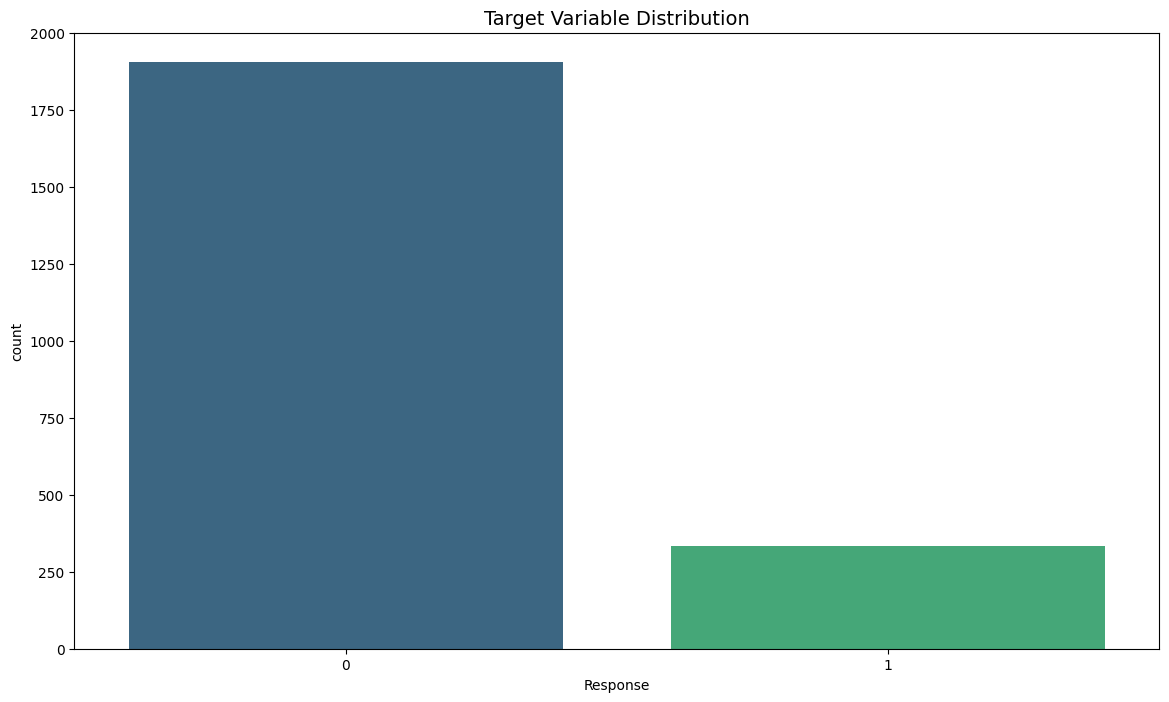

In [12]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Response', hue='Response', data=df, palette='viridis', legend=False)
plt.title('Target Variable Distribution', size=14)
plt.show()

# **3. Data Splitting**


Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).


In [13]:
label_encoder = LabelEncoder()
df.drop(['Dt_Customer'], axis=1, inplace=True)
categorical_columns = ['Education', 'Marital_Status', 'Age', 'Income']

for column in categorical_columns:
  df[column] = label_encoder.fit_transform(df[column])
  
df.head()

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957          2               4    1190        0         0   
1  2174        1954          2               4     843        1         1   
2  4141        1965          2               5    1591        0         0   
3  6182        1984          2               5     245        1         0   
4  5324        1981          4               3    1193        1         0   

   Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
0       58       635         88  ...             0             0   
1       38        11          1  ...             0             0   
2       26       426         49  ...             0             0   
3       26        11          4  ...             0             0   
4       94       173         43  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Age  
0         11         1   39  
1         11         0   42  
2         11         0   31  
3         11         0   12  
4         11         0   15  

[5 rows x 29 columns]

In [30]:
scaler = MinMaxScaler()

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

X = df.drop(columns=['Response'])
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test: {y_test.shape}')

X_train shape: (1568, 28), y_train shape: (1568,)
X_test shape: (672, 28), y_test: (672,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**


Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.

1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.


In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
gbc = GradientBoostingClassifier().fit(X_train, y_train)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss').fit(X_train, y_train)
lgm = LGBMClassifier(force_col_wise=True).fit(X_train, y_train)
cbs = CatBoostClassifier(verbose=0).fit(X_train, y_train)

print('Model Training Done')

[LightGBM] [Info] Number of positive: 239, number of negative: 1329
[LightGBM] [Info] Total Bins 1822
[LightGBM] [Info] Number of data points in the train set: 1568, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152423 -> initscore=-1.715719
[LightGBM] [Info] Start training from score -1.715719
Model Training Done


Tulis narasi atau penjelasan algoritma yang Anda gunakan.


## **b. Evaluasi Model Klasifikasi**


Berikut adalah **rekomendasi** tahapannya.

1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


In [62]:
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  results = {
    'Confusion Matrix': cm,
      'True Positive (TP)': tp,
      'False Positive (FP)': fp,
      'False Negative (FN)': fn,
      'True Negative (TN)': tn,
      'Accuracy': accuracy_score(y_test, y_pred),
      'Precision': precision_score(y_test, y_pred),
      'Recall': recall_score(y_test, y_pred),
      'F1 Score': f1_score(y_test, y_pred)
  }
  
  return results

results = {
  'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
  'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
  'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
  'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test),
  'Gradient Boosting (GBC)': evaluate_model(gbc, X_test, y_test),
  'XGBoost (XGB)': evaluate_model(xgb, X_test, y_test),
  'LightGBM (LGM)': evaluate_model(lgm, X_test, y_test),
  'CatBoost (CBS)': evaluate_model(cbs, X_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

rows = []
for model_name, metrics in results.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1 Score': metrics['F1 Score']
  })
  
summary_df = pd.DataFrame(rows)
summary_df.sort_values(by='Accuracy', ascending=False, inplace=True)
summary_df

Model  Accuracy  Precision    Recall  F1 Score
3  Support Vector Machine (SVM)  0.877976   0.685714  0.252632  0.369231
8                CatBoost (CBS)  0.877976   0.658537  0.284211  0.397059
6                 XGBoost (XGB)  0.876488   0.590909  0.410526  0.484472
5       Gradient Boosting (GBC)  0.875000   0.617021  0.305263  0.408451
2            Random Forest (RF)  0.873512   0.625000  0.263158  0.370370
7                LightGBM (LGM)  0.872024   0.571429  0.378947  0.455696
0     K-Nearest Neighbors (KNN)  0.869048   0.577778  0.273684  0.371429
1            Decision Tree (DT)  0.816964   0.362745  0.389474  0.375635
4              Naive Bayes (NB)  0.782738   0.316547  0.463158  0.376068

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.


## **c. Tuning Model Klasifikasi (Optional)**


Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik


### Tuning Random Forest - Bayesian Optimization


In [65]:
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (10, 50),
    'min_samples_split': (2, 10),
    'criterion': ['gini', 'entropy']
}

bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)

print(f'Best parameters (Bayesian Optimization): {bayes_search.best_params_}')
best_rf_bayes = bayes_search.best_estimator_

bayes_search_score = best_rf_bayes.score(X_test, y_test)
print(f'Accuracy after Bayesian Optimization: {bayes_search_score:.2f}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END criterion=gini, max_depth=39, min_samples_split=9, n_estimators=226; total time=   0.8s
[CV] END criterion=gini, max_depth=39, min_samples_split=9, n_estimators=226; total time=   0.8s
[CV] END criterion=gini, max_depth=39, min_samples_split=9, n_estimators=226; total time=   0.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END criterion=entropy, max_depth=45, min_samples_split=4, n_estimators=480; total time=   2.1s
[CV] END criterion=entropy, max_depth=45, min_samples_split=4, n_estimators=480; total time=   2.1s
[CV] END criterion=entropy, max_depth=45, min_samples_split=4, n_estimators=480; total time=   1.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END criterion=gini, max_depth=47, min_samples_split=3, n_estimators=273; total time=   0.7s
[CV] END criterion=gini, max_depth=47, min_samples_split=3, n_estimators=273; total time=   0.7s
[CV] END criterion=gini, max_depth=47,

### Tuning Random Forest - Random Search


In [66]:
param_dist = {
    'n_estimators': np.linspace(100, 500, 100, dtype=int),
    'max_depth': np.linspace(10, 50, 5, dtype=int),
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print(f'Best parameters (Random Search): {random_search.best_params_}')
best_rf_random = random_search.best_estimator_

random_search_score = best_rf_random.score(X_test, y_test)
print(f'Accuracy after Random Search: {random_search_score:.2f}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END criterion=gini, max_depth=40, min_samples_split=10, n_estimators=221; total time=   1.3s
[CV] END criterion=gini, max_depth=40, min_samples_split=10, n_estimators=221; total time=   1.3s
[CV] END criterion=gini, max_depth=30, min_samples_split=10, n_estimators=342; total time=   1.8s
[CV] END criterion=gini, max_depth=30, min_samples_split=10, n_estimators=342; total time=   1.9s
[CV] END criterion=gini, max_depth=30, min_samples_split=10, n_estimators=342; total time=   1.9s
[CV] END criterion=gini, max_depth=40, min_samples_split=10, n_estimators=221; total time=   1.0s
[CV] END criterion=gini, max_depth=50, min_samples_split=2, n_estimators=479; total time=   2.5s
[CV] END criterion=gini, max_depth=50, min_samples_split=2, n_estimators=479; total time=   2.5s
[CV] END criterion=gini, max_depth=50, min_samples_split=2, n_estimators=479; total time=   2.5s
[CV] END criterion=entropy, max_depth=10, min_samples_split=

### Tuning Random Forest - Random Grid


In [67]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best parameters (Grid Search): {grid_search.best_params_}')
best_rf_grid = grid_search.best_estimator_

# evaluate model performance after grid search
grid_search_score = best_rf_grid.score(X_test, y_test)
print(f'Accuracy after Grid Search: {grid_search_score:.2f}')

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_est

### Tuning Support Vector Machine - Random Search


In [73]:
param_dist = {
    'C': np.logspace(-3, 3, 7),            # Regularization parameter (C)
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
    'degree': [2, 3, 4, 5],                # Degree of the polynomial kernel function
    'coef0': [0, 0.1, 1],                  # Independent term in kernel
}

# Tuning model menggunakan RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit model dengan data latih
random_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print(f'Best parameters (Random Search): {random_search.best_params_}')

# Mendapatkan model terbaik
best_svm_random = random_search.best_estimator_

# Menghitung akurasi pada data uji
random_search_score = best_svm_random.score(X_test, y_test)
print(f'Accuracy after Random Search: {random_search_score:.2f}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END C=1000.0, coef0=1, degree=2, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1000.0, coef0=1, degree=2, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=0.001, coef0=1, degree=4, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .C=0.001, coef0=0, degree=4, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .C=0.001, coef0=0, degree=4, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=1000.0, coef0=1, degree=2, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ..C=0.1, coef0=0, degree=2, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ..C=0.1, coef0=0, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, coef0=0, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .C=0.001, coef0=0, degree=4, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .C=0.1, coef0=0, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....C=1.0, coef0=1, 

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**


Berikut adalah rekomendasi tahapannya.

1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


In [74]:
results = {
  'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
  'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
  'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
  'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test),
  'Gradient Boosting (GBC)': evaluate_model(gbc, X_test, y_test),
  'XGBoost (XGB)': evaluate_model(xgb, X_test, y_test),
  'LightGBM (LGM)': evaluate_model(lgm, X_test, y_test),
  'CatBoost (CBS)': evaluate_model(cbs, X_test, y_test),
  'Random Forest (RF) - Bayesian Optimization': evaluate_model(best_rf_bayes, X_test, y_test),
  'Random Forest (RF) - Random Search': evaluate_model(best_rf_random, X_test, y_test),
  'Random Forest (RF) - Grid Search': evaluate_model(best_rf_grid, X_test, y_test),
  'Support Vector Machine (SVM) - Random Search': evaluate_model(best_svm_random, X_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

rows = []
for model_name, metrics in results.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1 Score': metrics['F1 Score']
  })
  
summary_df = pd.DataFrame(rows)
summary_df.sort_values(by='F1 Score', ascending=False, inplace=True)
summary_df

Model  Accuracy  Precision  \
6                                  XGBoost (XGB)  0.876488   0.590909   
7                                 LightGBM (LGM)  0.872024   0.571429   
5                        Gradient Boosting (GBC)  0.875000   0.617021   
12  Support Vector Machine (SVM) - Random Search  0.875000   0.617021   
8                                 CatBoost (CBS)  0.877976   0.658537   
4                               Naive Bayes (NB)  0.782738   0.316547   
1                             Decision Tree (DT)  0.816964   0.362745   
0                      K-Nearest Neighbors (KNN)  0.869048   0.577778   
2                             Random Forest (RF)  0.873512   0.625000   
3                   Support Vector Machine (SVM)  0.877976   0.685714   
10            Random Forest (RF) - Random Search  0.869048   0.589744   
9     Random Forest (RF) - Bayesian Optimization  0.872024   0.628571   
11              Random Forest (RF) - Grid Search  0.872024   0.628571   

      Recall  F1 Score  
6   0.410526  0.484472  
7   0.378947  0.455696  
5   0.305263  0.408451  
12  0.305263  0.408451  
8   0.284211  0.397059  
4   0.463158  0.376068  
1   0.389474  0.375635  
0   0.273684  0.371429  
2   0.263158  0.370370  
3   0.252632  0.369231  
10  0.242105  0.343284  
9   0.231579  0.338462  
11  0.231579  0.338462

## **e. Analisis Hasil Evaluasi Model Klasifikasi**


# Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning

| Model                                          | Accuracy     | Precision    | Recall       | F1 Score     | Rata-rata    |
| ---------------------------------------------- | ------------ | ------------ | ------------ | ------------ | ------------ |
| **XGBoost (XGB)**                              | 0.876488     | 0.590909     | 0.410526     | **0.484472** | **0.590849** |
| **CatBoost (CBS)**                             | **0.877976** | 0.658537     | 0.284211     | 0.397059     | 0.554696     |
| **Gradient Boosting (GBC)**                    | 0.875000     | 0.617021     | 0.305263     | 0.408451     | 0.551684     |
| **LightGBM (LGM)**                             | 0.872024     | 0.571429     | 0.378947     | 0.455696     | 0.569774     |
| **Random Forest (RF)**                         | 0.873512     | 0.625000     | 0.263158     | 0.370370     | 0.532010     |
| **K-Nearest Neighbors (KNN)**                  | 0.869048     | 0.577778     | 0.273684     | 0.371429     | 0.523735     |
| **Random Forest (RF) - Bayesian Optimization** | 0.872024     | 0.628571     | 0.231579     | 0.338462     | 0.517909     |
| **Random Forest (RF) - Grid Search**           | 0.872024     | 0.628571     | 0.231579     | 0.338462     | 0.517909     |
| **Random Forest (RF) - Random Search**         | 0.869048     | 0.589744     | 0.242105     | 0.343284     | 0.511520     |
| **Decision Tree (DT)**                         | 0.816964     | 0.362745     | 0.389474     | 0.375635     | 0.486705     |
| **Naive Bayes (NB)**                           | 0.782738     | 0.316547     | **0.463158** | 0.376068     | 0.484878     |
| **Support Vector Machine (SVM)**               | **0.877976** | **0.685714** | 0.252632     | 0.369231     | 0.546888     |

# Identifikasi Kelemahan Model:

1. **Precision atau Recall Rendah untuk Kelas Tertentu:**

   - **Precision** untuk model seperti **Naive Bayes (NB)** dan **Support Vector Machine (SVM)** cukup rendah, yang menunjukkan adanya banyak **false positives**.
   - **Recall** untuk model-model seperti **Random Forest (RF)** dan **Naive Bayes (NB)** cenderung lebih rendah, yang berarti model tidak terlalu baik dalam mendeteksi kelas positif (misalnya, tidak dapat mendeteksi banyak instance kelas minoritas).

2. **Overfitting atau Underfitting:**
   - **Overfitting**: Model-model yang memiliki **high precision dan low recall** (misalnya **XGBoost** dan **CatBoost**) cenderung overfit terhadap kelas mayoritas, karena mereka lebih fokus pada memprediksi kelas mayoritas dengan akurat.
   - **Underfitting**: Model seperti **K-Nearest Neighbors (KNN)** dan **Naive Bayes (NB)** menunjukkan **underfitting**, karena F1 Score-nya relatif rendah dan model gagal dalam menangani kelas minoritas dengan baik.

---

# Rekomendasi Tindakan Lanjutan:

- Mengumpulkan lebih banyak data dari kelas minoritas atau menggunakan **oversampling**/**undersampling** dapat membantu meningkatkan recall tanpa mengorbankan precision.

- Melakukan **hyperparameter tuning** yang lebih mendalam pada model-model seperti **Support Vector Machine (SVM)**, **XGBoost**, dan **CatBoost**.
- Pertimbangkan untuk mencoba algoritma **ensemble** seperti **Stacking** yang menggabungkan kekuatan beberapa model untuk meningkatkan kinerja secara keseluruhan.
- Algoritma **Neural Networks** atau **AutoML** juga bisa dicoba untuk meningkatkan hasil model.
- Menggunakan **confusion matrix** untuk menganalisis lebih dalam tentang jenis kesalahan yang dilakukan model.
- Mengimplementasikan **SMOTE** atau **class weights** untuk memperbaiki kinerja pada kelas minoritas.
